In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import utils9
import random

### Import data set

In [44]:
data = pd.read_csv('NY-House-Dataset.csv')
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


### Data Cleaning

In [45]:
# convert all columns to lower case
data.columns = data.columns.str.lower()

In [46]:
# check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   int64  
 3   beds                         4801 non-null   int64  
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         

In [47]:
# show the data statistics using the describe function
data.describe()

,price,beds,bath,propertysqft,latitude,longitude
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


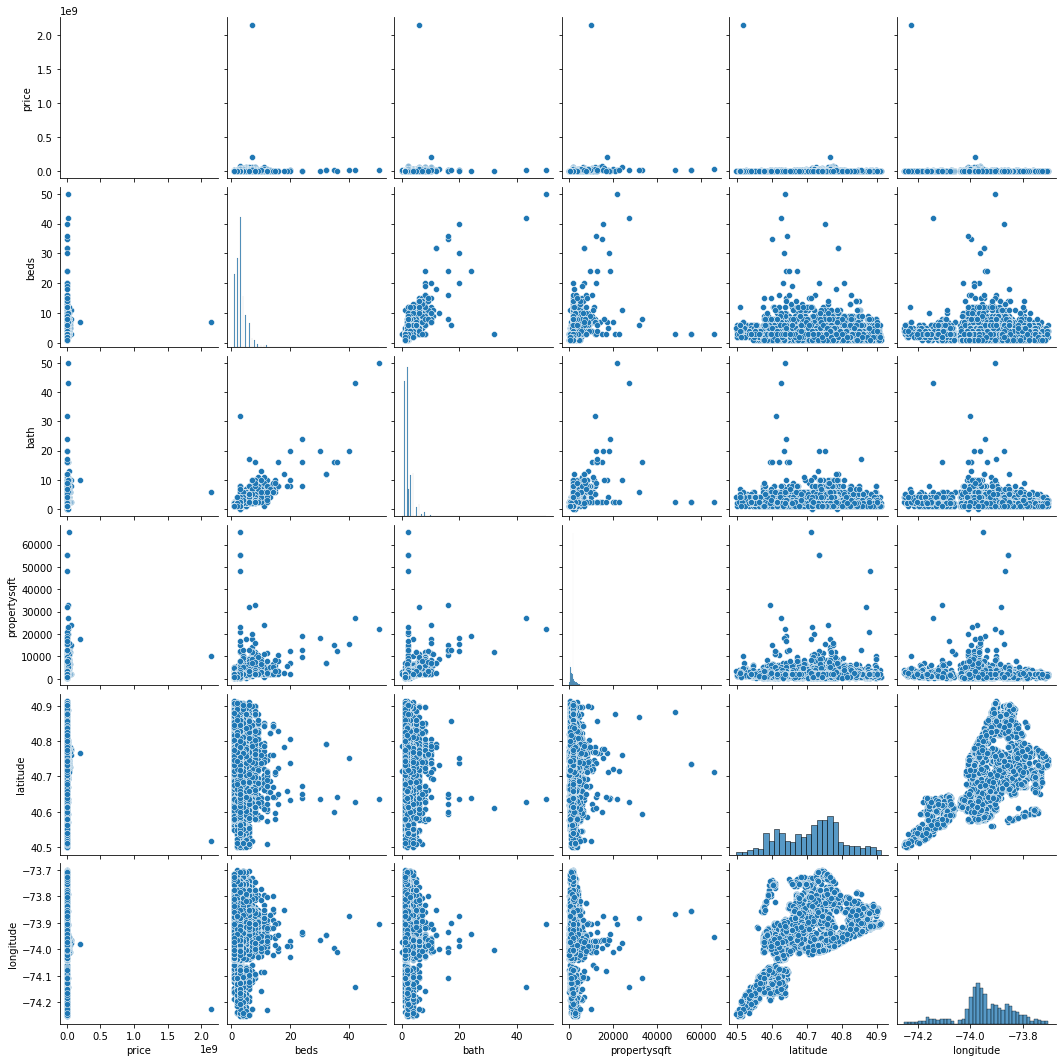

In [48]:
# check relationship between the columns using scatter plot
sns.pairplot(data)

In [49]:
# looking at the visual above, it shows that there's an outlier in the price column
# check where the outlier is

data.nlargest(5, 'price')

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191


In [50]:
# it's seen that the largest number for price is in index 304
# drop the row

data.drop(index=304, inplace=True)

In [51]:
# resetting index
data = data.reset_index(drop=True)

In [52]:
# convert bath column to integer
data.dtypes
data[['bath']] = data[['bath']].astype(int)

In [53]:
# clean up type column
data.type.value_counts()

Co-op for sale                1450
House for sale                1011
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: type, dtype: int64

In [54]:
# replace condop with condo
data["type"] = data.type.str.replace("Condop", "Condo").str.strip()

In [55]:
# check out locality
data.locality.value_counts()

New York           2504
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Queens                6
Brooklyn              6
The Bronx             5
Flatbush              1
Name: locality, dtype: int64

In [56]:
"""
New York County (Manhattan),
Kings County (Brooklyn), 
Bronx County (The Bronx), 
Richmond County (Staten Island),
Queens County (Queens).
"""

'\nNew York County (Manhattan),\nKings County (Brooklyn), \nBronx County (The Bronx), \nRichmond County (Staten Island),\nQueens County (Queens).\n'

In [57]:
data["locality"] = data.locality.str.replace("Brooklyn", "Kings County").str.strip()
data["locality"] = data.locality.str.replace("The Bronx", "Bronx County").str.strip()
data["locality"] = data.locality.str.replace("Queens County", "Queen County").str.strip()
data["locality"] = data.locality.str.replace("Queens", "Queen County").str.strip()
data["locality"] = data.locality.str.replace("Queen County", "Queens County").str.strip()

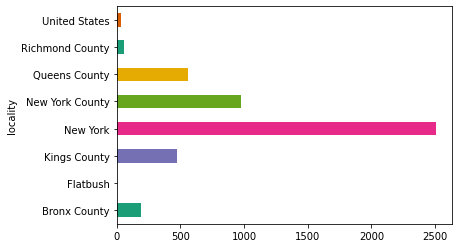

In [58]:
data.groupby('locality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

In [59]:
# call out only the columns we will need to create out model
house = data[['price', 'beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'type', 'locality']]
house

,price,beds,bath,propertysqft,latitude,longitude,type,locality
0,315000,2,2,1400.000000,40.761255,-73.974483,Condo for sale,New York
1,195000000,7,10,17545.000000,40.766393,-73.980991,Condo for sale,New York
2,260000,4,2,2015.000000,40.541805,-74.196109,House for sale,New York
3,69000,3,1,445.000000,40.761398,-73.974613,Condo for sale,New York
4,55000000,7,2,14175.000000,40.767224,-73.969856,Townhouse for sale,New York
...,...,...,...,...,...,...,...,...
4795,599000,1,1,2184.207862,40.774350,-73.955879,Co-op for sale,New York County
4796,245000,1,1,2184.207862,40.732538,-73.860152,Co-op for sale,New York
4797,1275000,1,1,2184.207862,40.745882,-74.003398,Co-op for sale,New York
4798,598125,2,1,655.000000,40.742770,-73.872752,Condo for sale,Queens County


In [60]:
# convert the type and locality columns to nemerical values
df = pd.get_dummies(house)
df

,price,beds,bath,propertysqft,latitude,longitude,type_Co-op for sale,type_Coming Soon,type_Condo for sale,type_Contingent,...,type_Pending,type_Townhouse for sale,locality_Bronx County,locality_Flatbush,locality_Kings County,locality_New York,locality_New York County,locality_Queens County,locality_Richmond County,locality_United States
0,315000,2,2,1400.000000,40.761255,-73.974483,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,195000000,7,10,17545.000000,40.766393,-73.980991,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,260000,4,2,2015.000000,40.541805,-74.196109,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,69000,3,1,445.000000,40.761398,-73.974613,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,55000000,7,2,14175.000000,40.767224,-73.969856,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,599000,1,1,2184.207862,40.774350,-73.955879,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4796,245000,1,1,2184.207862,40.732538,-73.860152,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4797,1275000,1,1,2184.207862,40.745882,-74.003398,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4798,598125,2,1,655.000000,40.742770,-73.872752,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
#drop the locality_flatbush column
df = df.drop(columns = 'locality_Flatbush')

In [62]:
df.head()

,price,beds,bath,propertysqft,latitude,longitude,type_Co-op for sale,type_Coming Soon,type_Condo for sale,type_Contingent,...,type_Multi-family home for sale,type_Pending,type_Townhouse for sale,locality_Bronx County,locality_Kings County,locality_New York,locality_New York County,locality_Queens County,locality_Richmond County,locality_United States
0,315000,2,2,1400.0,40.761255,-73.974483,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,195000000,7,10,17545.0,40.766393,-73.980991,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,260000,4,2,2015.0,40.541805,-74.196109,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,69000,3,1,445.0,40.761398,-73.974613,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,55000000,7,2,14175.0,40.767224,-73.969856,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [63]:
df.describe()

,price,beds,bath,propertysqft,latitude,longitude,type_Co-op for sale,type_Coming Soon,type_Condo for sale,type_Contingent,...,type_Multi-family home for sale,type_Pending,type_Townhouse for sale,locality_Bronx County,locality_Kings County,locality_New York,locality_New York County,locality_Queens County,locality_Richmond County,locality_United States
count,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,1.910039e+06,3.356042,2.349583,2182.579572,40.714268,-73.941542,0.302083,0.000417,0.186667,0.018333,...,0.151458,0.050625,0.062292,0.038958,0.097917,0.521667,0.203958,0.117292,0.012292,0.007708
std,4.929167e+06,2.602054,1.948568,2374.709381,0.087639,0.101011,0.459209,0.020410,0.389684,0.134168,...,0.358532,0.219254,0.241710,0.193516,0.297233,0.499582,0.402980,0.321801,0.110196,0.087467
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639512,-73.987143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726756,-73.949182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771924,-73.870638,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.950000e+08,50.000000,50.000000,65535.000000,40.912729,-73.702450,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Split dataset

In [65]:
X = df.drop(columns = 'price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [66]:
print("Train sets: ", X_train.shape)
print("Validation sets: ", X_val.shape)
print("Test sets: ", X_test.shape)

Train sets:  (3360, 24)
Validation sets:  (720, 24)
Test sets:  (720, 24)


### DecisionTree Model

In [67]:
# creating different decision tree model

#first model, using MSE criteria
dt_mse = DecisionTreeRegressor(criterion='mse', max_depth = 5, min_samples_split = 2, min_samples_leaf = 2, max_features = 15,
                               min_impurity_decrease=0.8)
dt_mse.fit(X_train, y_train)

#second model, using MAE criteria
dt_mae = DecisionTreeRegressor(criterion='mae', max_depth = 5, min_samples_split = 3, min_samples_leaf = 3, max_features = 17,
                               min_impurity_decrease=0.6)
dt_mae.fit(X_train, y_train)

#third model, using friedman_mse criteria
dt_friedman_mse = DecisionTreeRegressor(criterion='friedman_mse', max_depth = 5, min_samples_split = 2, min_samples_leaf = 2,
                              max_features = 18, min_impurity_decrease=0.4)
dt_friedman_mse.fit(X_train, y_train)

#forth model, using poisson criteria
dt_poisson = DecisionTreeRegressor(criterion='poisson', max_depth = 4, min_samples_split = 2, min_samples_leaf = 2,
                              max_features = 20, min_impurity_decrease=0.4)
dt_poisson.fit(X_train, y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features=20,
                      min_impurity_decrease=0.4, min_samples_leaf=2)

In [68]:
# check the score for each model
mse_score = dt_mse.score(X_train, y_train)
mae_score = dt_mae.score(X_train, y_train)
fdmse_score = dt_friedman_mse.score(X_train, y_train)
poisson_score = dt_poisson.score(X_train, y_train)

print('MSE score: ', mse_score)
print('MAE Score: ', mae_score)
print('Friedman_mse_score: ', fdmse_score)
print('poisson_score: ', poisson_score)

MSE score:  0.6044697307034292
MAE Score:  0.42422447158695187
Friedman_mse_score:  0.621493886938528
poisson_score:  0.4090525537185863


#### Choosing the best two models

Based on the scores displayed above, the best two models are the **Mean_Squared_Error**  and **Friedman_mse**.

In [69]:
# make predictions on training set
train_pred_mse = dt_mse.predict(X_train)
train_pred_mae = dt_mae.predict(X_train)
train_pred_frdmse = dt_friedman_mse.predict(X_train)
train_pred_poisson = dt_poisson.predict(X_train)

# make predictions on validation set
val_pred_mse = dt_mse.predict(X_val)
val_pred_mae = dt_mae.predict(X_val)
val_pred_frdmse = dt_friedman_mse.predict(X_val)
val_pred_poisson = dt_poisson.predict(X_val)

In [71]:
#calculating accuracy score and mean squared error of each of the model's validation and train dataset to see the better one
dt_mse_accuracy_val =  mean_squared_error(y_val, val_pred_mse)
dt_mse_accuracy_train = mean_squared_error(y_train, train_pred_mse)

dt_mae_accuracy_val =  mean_squared_error(y_val, val_pred_mae)
dt_mae_accuracy_train =  mean_squared_error(y_train, train_pred_mae)

dt_friedman_accuracy_val =  mean_squared_error(y_val, val_pred_frdmse)
dt_friedman_accuracy_train =  mean_squared_error(y_train, train_pred_frdmse)

dt_poisson_accuracy_val =  mean_squared_error(y_val, val_pred_poisson)
dt_poisson_accuracy_train =  mean_squared_error(y_train, train_pred_poisson)

#saving it to a dictionary
dt_validation_accuracy = {
    "Decision Tree (mse)": dt_mse_accuracy_val,
    "Decision Tree (mae)": dt_mae_accuracy_val,
    "Decision Tree (poisson)": dt_poisson_accuracy_val,
    "Decision Tree (freidman)": dt_friedman_accuracy_val
     }

dt_train_accuracy = {
    "Decision Tree (mse)": dt_mse_accuracy_train ,
    "Decision Tree (mae)": dt_mae_accuracy_train,
    "Decision Tree (poisson)": dt_poisson_accuracy_train ,
    "Decision Tree (freidman)": dt_friedman_accuracy_train
    }

In [72]:
print(dt_validation_accuracy)

{'Decision Tree (mse)': 10040713144928.285, 'Decision Tree (mae)': 10278422350593.004, 'Decision Tree (poisson)': 19300048053981.504, 'Decision Tree (freidman)': 8634976651596.905}


In [73]:
print(dt_train_accuracy)

{'Decision Tree (mse)': 10756223230165.6, 'Decision Tree (mae)': 15657891683211.809, 'Decision Tree (poisson)': 16070483457065.445, 'Decision Tree (freidman)': 10293260875614.076}


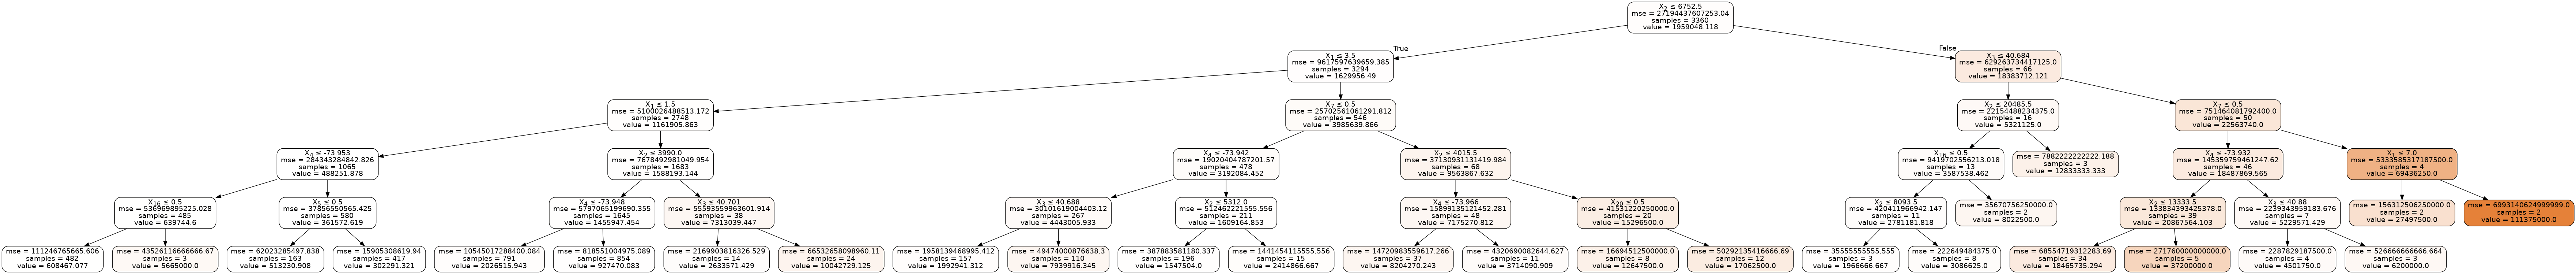

In [74]:
utils9.display_tree(dt_mse)

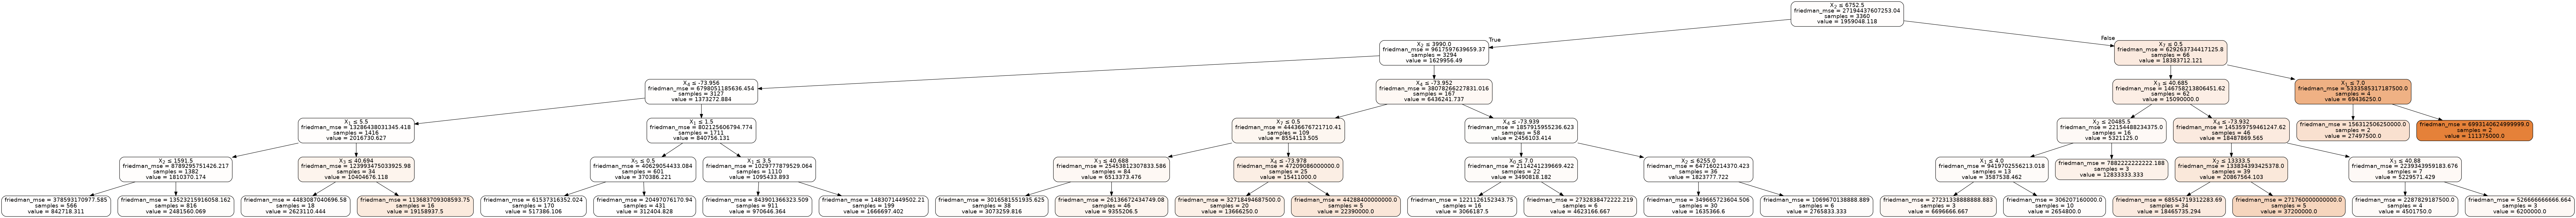

In [75]:
utils9.display_tree(dt_friedman_mse)

In [76]:
#display best model's parameters
print("The first best model is DT with parameters: ", dt_friedman_mse.get_params())
print('*'*80)
print("The second best model is DT with parameters: ", dt_mse.get_params())

The first best model is DT with parameters:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 18, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.4, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
********************************************************************************
The second best model is DT with parameters:  {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 5, 'max_features': 15, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.8, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Based on the mean squared error values on the training and validation sets, the MSE AND Friedman_mse metrics provided the least error values which made them the best performing metrics compared to other metrics(MAE and poisson).

### SVM (SVR) Model

#### Creating SVR models with different kernels

In [77]:
# creating linear kernel with different values of C
# C = 0.01
svm_c_001 = SVR(kernel='linear', C=0.01)
svm_c_001.fit(X_train, y_train)
print("Accuracy:", svm_c_001.score(X_train, y_train))

# C = 10
svm_c_10 = SVR(kernel='linear', C=10)
svm_c_10.fit(X_train, y_train)
print("Accuracy:", svm_c_10.score(X_train, y_train))

# creating rbf kernel with different values of gamma
# gamma = 0.1
svm_gamma_01 = SVR(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(X_train, y_train)
print("Accuracy:", svm_gamma_01.score(X_train, y_train))

# gamma = 1
svm_gamma_1 = SVR(kernel='rbf', gamma=1)
svm_gamma_1.fit(X_train, y_train)
print("Accuracy:", svm_gamma_1.score(X_train, y_train))

# creating polynomial kernel with different values of degree
# degree = 2
svm_degree_2 = SVR(kernel='poly', degree = 2)
svm_degree_2.fit(X_train, y_train)
print("Accuracy:", svm_degree_2.score(X_train, y_train))


Accuracy: 0.10281572188093469
Accuracy: 0.10351809821369373
Accuracy: -0.04727413903069011
Accuracy: -0.04728938525719739
Accuracy: -0.045676066734505305


In [78]:
# make predictions on training set
train_pred_c_001 = svm_c_001.predict(X_train)
train_pred_c_10 = svm_c_10.predict(X_train)
train_pred_gamma_01 = svm_gamma_01.predict(X_train)
train_pred_gamma_1 = svm_gamma_1.predict(X_train)
train_pred_degree_2 = svm_degree_2.predict(X_train)

# make predictions on validation set
val_pred_c_001 = svm_c_001.predict(X_val)
val_pred_c_10 = svm_c_10.predict(X_val)
val_pred_gamma_01 = svm_gamma_01.predict(X_val)
val_pred_gamma_1 = svm_gamma_1.predict(X_val)
val_pred_degree_2 = svm_degree_2.predict(X_val)

In [79]:
#calculating accuracy score and mean squared error of each of the model's validation and train dataset to see the better one
c_001_accuracy_val =  mean_squared_error(y_val, val_pred_c_001)
c_001_accuracy_train = mean_squared_error(y_train, train_pred_c_001)

c_10_accuracy_val =  mean_squared_error(y_val, val_pred_c_10)
c_10_accuracy_train =  mean_squared_error(y_train, train_pred_c_10)

gamma_01_accuracy_val =  mean_squared_error(y_val, val_pred_gamma_01)
gamma_01_accuracy_train =  mean_squared_error(y_train, train_pred_gamma_01)

gamma_1_accuracy_val =  mean_squared_error(y_val, val_pred_gamma_1)
gamma_1_accuracy_train =  mean_squared_error(y_train, train_pred_gamma_1)

degree_2_accuracy_val =  mean_squared_error(y_val, val_pred_degree_2)
degree_2_accuracy_train =  mean_squared_error(y_train, train_pred_degree_2)

#saving it to a dictionary
SVR_validation_accuracy = {
    "SVR (C_001)": c_001_accuracy_val,
    "SVR (C_10)": c_10_accuracy_val,
    "SVR (gamma_01)": gamma_01_accuracy_val,
    "SVR (gamma_1)": gamma_1_accuracy_val,
    "SVR (degree_2)": degree_2_accuracy_val
     }

SVR_train_accuracy = {
    "SVR (C_001)": c_001_accuracy_train ,
    "SVR (C_10)": c_10_accuracy_train,
    "SVR (gamma_01)": gamma_01_accuracy_train ,
    "SVR (gamma_1)": gamma_1_accuracy_train,
    "SVR (degree_2)": degree_2_accuracy_val
    }

In [80]:
print(SVR_validation_accuracy)

{'SVR (C_001)': 19986077402297.234, 'SVR (C_10)': 19980508221849.758, 'SVR (gamma_01)': 25366591796877.035, 'SVR (gamma_1)': 25367006655243.18, 'SVR (degree_2)': 25240715953780.746}


In [81]:
print(SVR_train_accuracy)

{'SVR (C_001)': 24398421873517.312, 'SVR (C_10)': 24379321144159.285, 'SVR (gamma_01)': 28480031231559.785, 'SVR (gamma_1)': 28480445844115.285, 'SVR (degree_2)': 25240715953780.746}


In [82]:
#display best model's parameters
print("The first best model is SVR with parameters: ", svm_c_001.get_params())
print('*'*100)
print("The second best model is SVR with parameters: ", svm_c_10.get_params())

The first best model is SVR with parameters:  {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
****************************************************************************************************
The second best model is SVR with parameters:  {'C': 10, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Comparison between Decision Tree and SVM Models

**Question 1**


Based on the mean squared error derived from both decision tree and SVM models, by comparison, the mse values for the decision tree best models are far less than the mse values for the SVM best models. Based on these results, I conclude that the decision tree model is best suitable for this data set than the SVM model.

#### Using my selected model to make prediction on the test set

In [83]:
# The decision tree mse and friedman_mse are my selected models
# make prediction on test set
test_pred_mse = dt_mse.predict(X_test)
test_pred_frdmse = dt_friedman_mse.predict(X_test)

In [84]:
dt_mse_accuracy_test =  mean_squared_error(y_test, test_pred_mse)
dt_friedman_accuracy_test =  mean_squared_error(y_test, test_pred_frdmse)

print("Decision Tree (mse): ", dt_mse_accuracy_test)
print("Decision Tree (friedman_mse): ", dt_friedman_accuracy_test)

Decision Tree (mse):  6692424785124.152
Decision Tree (friedman_mse):  7086477230352.424


In [85]:
# The SVM model to make predictions on the test data
test_pred_c_001 = svm_c_001.predict(X_test)
test_pred_c_10 = svm_c_10.predict(X_test)

In [86]:
c_001_accuracy_test = mean_squared_error(y_test, test_pred_c_001)
c_10_accuracy_test =  mean_squared_error(y_test, test_pred_c_10)

print("SVR (C_001): ", c_001_accuracy_test)
print("SVR (C_10): ", c_10_accuracy_test)

SVR (C_001):  10194571162858.219
SVR (C_10):  10145034599292.566


Using both decision tree and SVM to make prediction on the test set, it's seen that the decision tree model performs better by having less error compared to the SVM model. And the important metrics for this problem are Friedman_mse and Mean Squared Error.